In [1]:
%pylab inline

def mysavefig(filename):
    plt.tight_layout()
    plt.savefig("../images/tp11/"+filename, bbox_inches="tight", dpi=600)
    return

Populating the interactive namespace from numpy and matplotlib


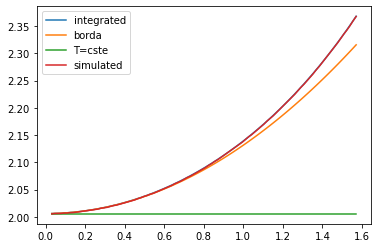

In [50]:
from scipy.integrate import quad, odeint

g = 9.81
l = 1
T0 = 2*np.pi*np.sqrt(l/g)

def func_period(theta, theta0):
    return 4 * np.sqrt(l / (2*g * (np.cos(theta) - np.cos(theta0))))
def period(theta0):
    def f(x):
        return func_period(x,theta0)    
    return quad(f,0,theta0)[0]

def borda(theta0):
    return T0 * (1 + theta0**2/16)

def pendulum(V,t):
    x,y = V
    dx = y
    dy = -g/l*np.sin(x)
    return (dx,dy)

def period_odeint(theta0):
    t = np.linspace(0,T0,10000)
    V = odeint(pendulum, [theta0,0], t)
    x = V[:,0]
    for i in range(len(t)):
        if x[i]*x[i+1] < 0 and x[i] > 0:
            T = 4 * t[i]
            break
    return T

theta0 = np.linspace(np.pi/100,np.pi/2,100)
T_int = np.zeros(len(theta0))
T_odeint = np.zeros(len(theta0))
for i in range(len(theta0)):
    T_int[i] = period(theta0[i])
    T_odeint[i] = period_odeint(theta0[i])
       
plt.plot(theta0,T_int,label='integrated')
plt.plot(theta0,borda(theta0),label="borda")
plt.plot(theta0,np.ones(len(theta0))*T0, label="T=cste")
plt.plot(theta0,T_odeint,label='simulated')
plt.legend()

<ipython-input-50-0b5dc3a71e21>:8: RuntimeWarning: divide by zero encountered in true_divide
  return 4 * np.sqrt(l / (2*g * (np.cos(theta) - np.cos(theta0))))


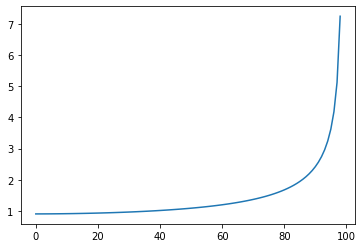

In [51]:
plt.plot(func_period(theta0,theta0.max()))

In [45]:
period_odeint(theta0[0])

1.9452767812951735